In [19]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 40 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_unknownUser_v9231n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.355 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [20]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV1.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('ProductID')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Units,Revenue_T,Manufacturer,Segment,IsCompete,MonthNo,Region,District
12,31676.4,Natura,Convenience,No,12,East,District #02
7,11020.6,Pirum,Productivity,No,12,West,District #38
7,11020.6,Pirum,Productivity,No,12,West,District #38
3,35010.4,VanArsdel,Moderation,Yes,12,East,District #10
3,16441.1,Currus,Select,No,12,West,District #38
3,35541.4,Abbas,Moderation,Yes,12,West,District #36
2,2518.74,Natura,Youth,No,12,East,District #06
2,2518.74,Natura,Youth,No,12,East,District #13
2,9070.74,Quibus,Select,No,12,East,District #18
2,28348.7,VanArsdel,Moderation,Yes,12,East,District #05


In [21]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [22]:
train

Units,Revenue_T,Manufacturer,Segment,IsCompete,MonthNo,Region,District
7,11020.6,Pirum,Productivity,No,12,West,District #38
3,35010.4,VanArsdel,Moderation,Yes,12,East,District #10
3,16441.1,Currus,Select,No,12,West,District #38
3,35541.4,Abbas,Moderation,Yes,12,West,District #36
2,28348.7,VanArsdel,Moderation,Yes,12,East,District #05
2,9058.14,Currus,All Season,No,12,East,District #03
2,26458.7,Natura,Moderation,Yes,12,East,District #10
1,15113.7,Natura,Moderation,Yes,12,East,District #02
1,14615.4,Natura,Moderation,Yes,12,East,District #12
1,9002.7,Aliqui,Extreme,No,12,Central,District #31


In [23]:
valid

Units,Revenue_T,Manufacturer,Segment,IsCompete,MonthNo,Region,District
2,2518.74,Natura,Youth,No,12,East,District #06
2,10382.4,Natura,Convenience,No,12,Central,District #31
1,9002.7,Aliqui,Extreme,No,12,East,District #13
1,12851.4,VanArsdel,Moderation,Yes,12,East,District #16
1,12851.4,VanArsdel,Moderation,Yes,12,Central,District #23
1,12851.4,VanArsdel,Moderation,Yes,12,East,District #02
1,12851.4,VanArsdel,Moderation,Yes,12,East,District #04
1,7307.37,Currus,Extreme,No,12,East,District #13
1,7370.37,Currus,Extreme,No,12,West,District #36
1,16316.4,VanArsdel,Moderation,Yes,12,East,District #02


In [24]:
unseen

Units,Revenue_T,Manufacturer,Segment,IsCompete,MonthNo,Region,District
12,31676.4,Natura,Convenience,No,12,East,District #02
7,11020.6,Pirum,Productivity,No,12,West,District #38
2,2518.74,Natura,Youth,No,12,East,District #13
2,9070.74,Quibus,Select,No,12,East,District #18
1,6708.87,VanArsdel,Convenience,No,12,Central,District #24
1,9128.7,Aliqui,Extreme,No,12,East,District #03
1,9002.7,Aliqui,Extreme,No,12,East,District #02
1,7553.7,Natura,Extreme,No,12,West,District #39
1,6986.7,Aliqui,Extreme,No,12,West,District #34
1,12851.4,VanArsdel,Moderation,Yes,12,Central,District #28


In [25]:
y = "Revenue_T"
x=train.columns
x.remove(y)

# Тренировка модели

In [26]:
encoding = "one_hot_explicit"

In [27]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
11:15:15.114: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [28]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_3_20230921_111515,1960.32,3.84287e+06,1359.6,0.416679,3.84287e+06
StackedEnsemble_AllModels_1_AutoML_3_20230921_111515,1963.53,3.85543e+06,1358.7,0.416602,3.85543e+06
GBM_3_AutoML_3_20230921_111515,1965.44,3.86297e+06,1361.59,0.419784,3.86297e+06
GBM_2_AutoML_3_20230921_111515,1970.28,3.88201e+06,1364.53,0.420398,3.88201e+06
GBM_4_AutoML_3_20230921_111515,1971,3.88485e+06,1360.37,0.418948,3.88485e+06
XGBoost_3_AutoML_3_20230921_111515,1973.34,3.89405e+06,1365.13,0.41984,3.89405e+06
XGBoost_1_AutoML_3_20230921_111515,1987.62,3.95062e+06,1360.32,nan,3.95062e+06
XGBoost_2_AutoML_3_20230921_111515,1989.71,3.95893e+06,1359.99,nan,3.95893e+06
DRF_1_AutoML_3_20230921_111515,2024.47,4.09847e+06,1366.29,0.419273,4.09847e+06
GBM_1_AutoML_3_20230921_111515,2078.98,4.32217e+06,1366.7,0.41915,4.32217e+06


In [29]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_3_20230921_111515',
 'StackedEnsemble_AllModels_1_AutoML_3_20230921_111515',
 'GBM_3_AutoML_3_20230921_111515',
 'GBM_2_AutoML_3_20230921_111515',
 'GBM_4_AutoML_3_20230921_111515',
 'XGBoost_3_AutoML_3_20230921_111515',
 'XGBoost_1_AutoML_3_20230921_111515',
 'XGBoost_2_AutoML_3_20230921_111515',
 'DRF_1_AutoML_3_20230921_111515',
 'GBM_1_AutoML_3_20230921_111515',
 'XRT_1_AutoML_3_20230921_111515',
 'GLM_1_AutoML_3_20230921_111515']

In [30]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [31]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [32]:
metalearner.coef_norm()

{'Intercept': 5744.722506712622,
 'GBM_3_AutoML_3_20230921_111515': 886.0880075493858,
 'GBM_2_AutoML_3_20230921_111515': 582.5472190436426,
 'GBM_4_AutoML_3_20230921_111515': 629.6592129417886,
 'XGBoost_3_AutoML_3_20230921_111515': 1087.1352972769928,
 'XGBoost_1_AutoML_3_20230921_111515': 452.2629892970919,
 'XGBoost_2_AutoML_3_20230921_111515': 291.03316686454775,
 'DRF_1_AutoML_3_20230921_111515': 242.69211919848635,
 'GBM_1_AutoML_3_20230921_111515': 0.0,
 'XRT_1_AutoML_3_20230921_111515': 0.0,
 'GLM_1_AutoML_3_20230921_111515': 0.0}

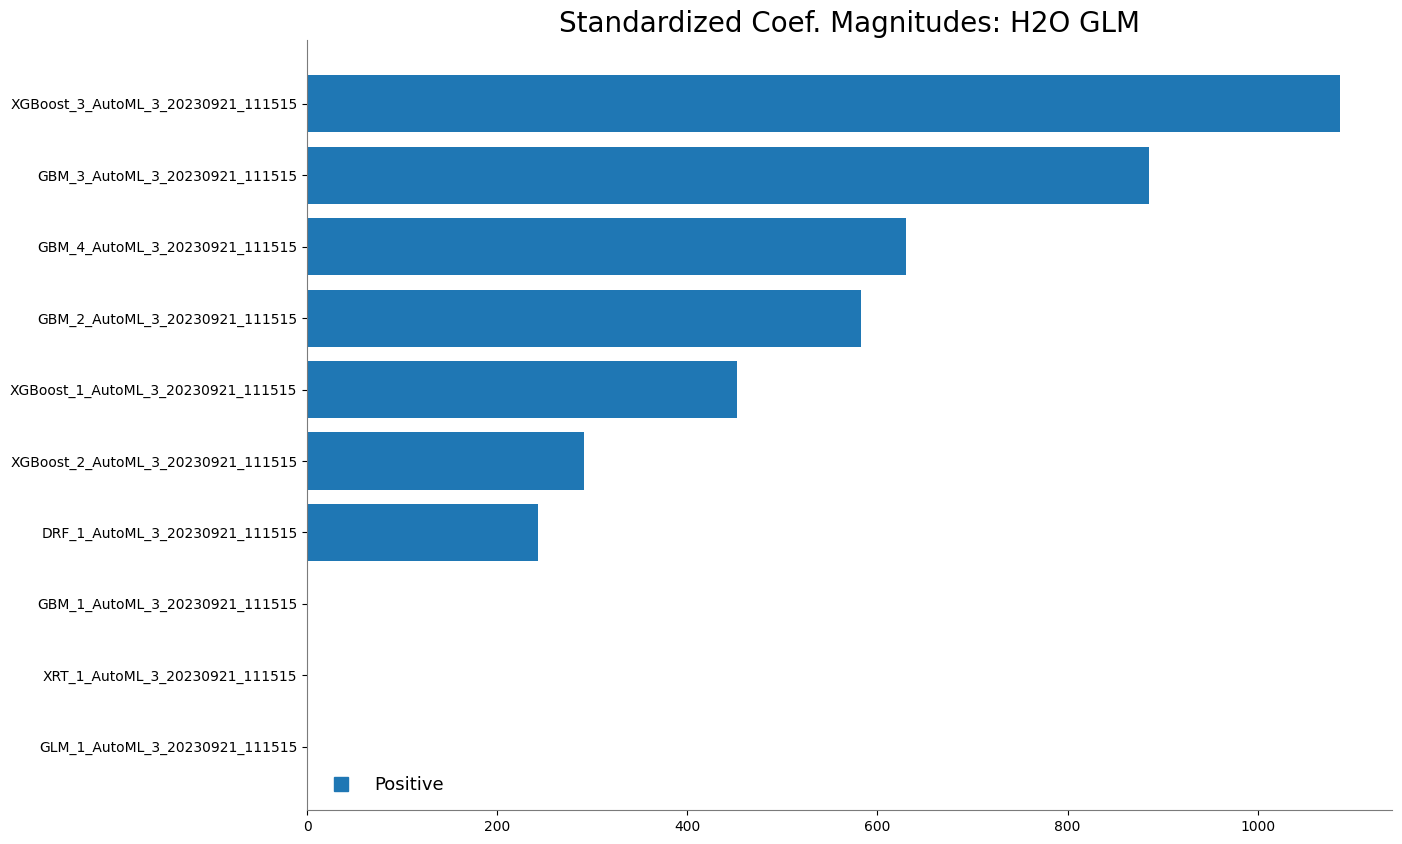

In [33]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_BestOfFamily_1_AutoML_3_20230921_111515
StackedEnsemble_BestOfFamily_1_AutoML_3_20230921_111515 - ERROR PLOTTING
Model ID: StackedEnsemble_AllModels_1_AutoML_3_20230921_111515
StackedEnsemble_AllModels_1_AutoML_3_20230921_111515 - ERROR PLOTTING
Model ID: GBM_3_AutoML_3_20230921_111515


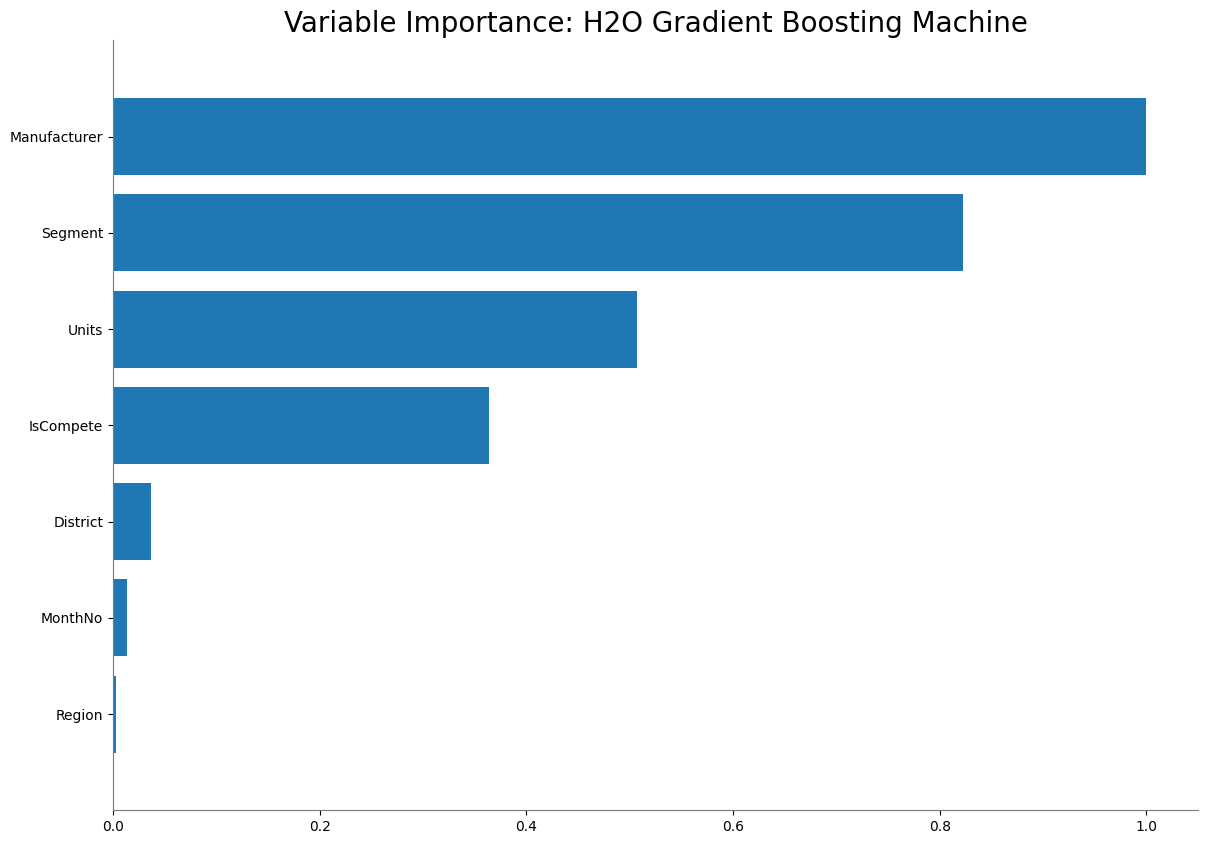

Model ID: GBM_2_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

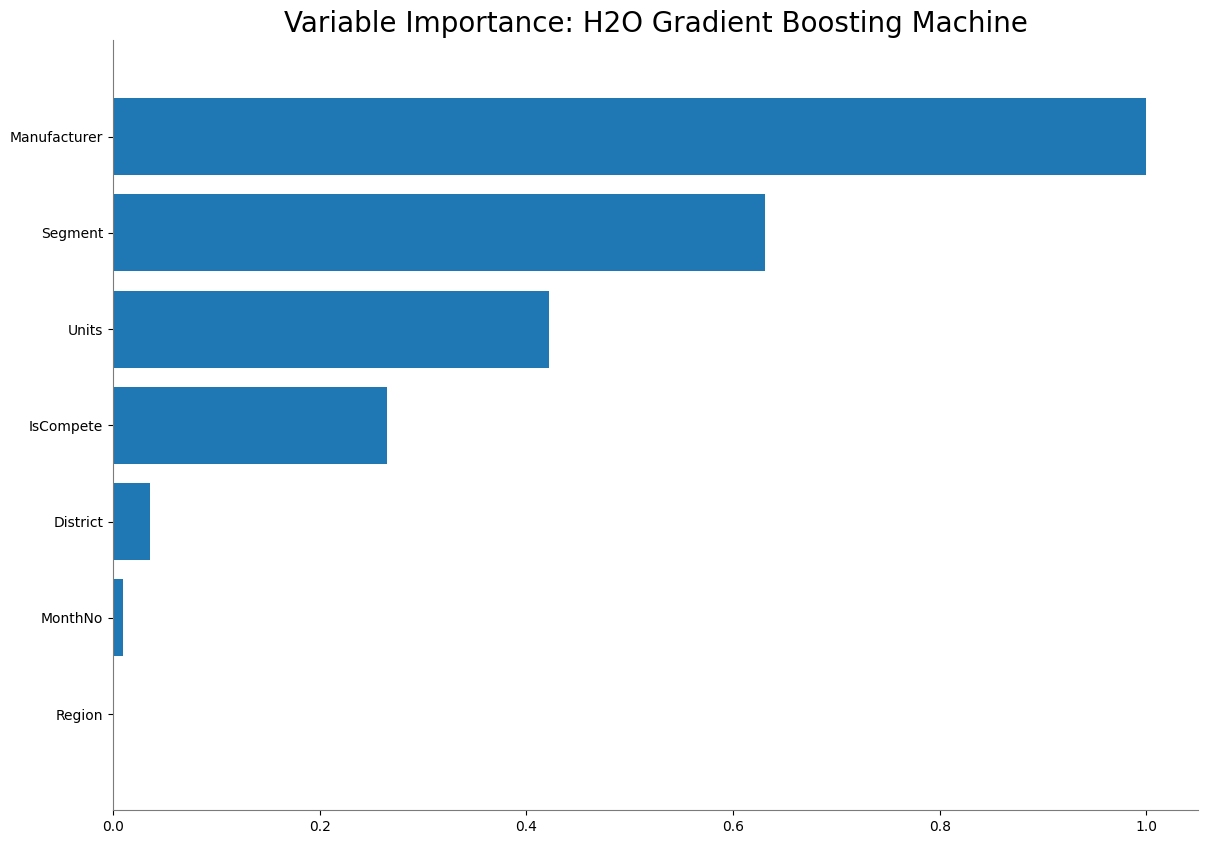

Model ID: GBM_4_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

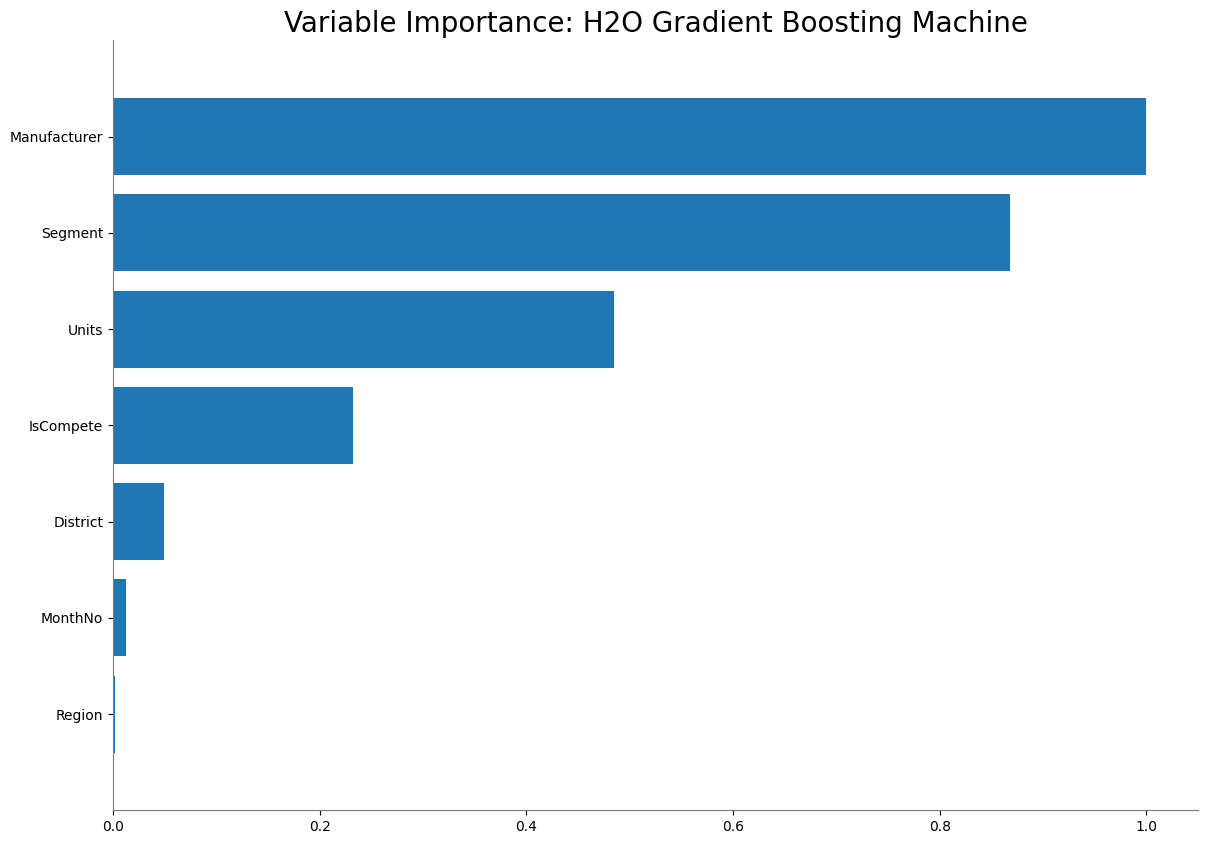

Model ID: XGBoost_3_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

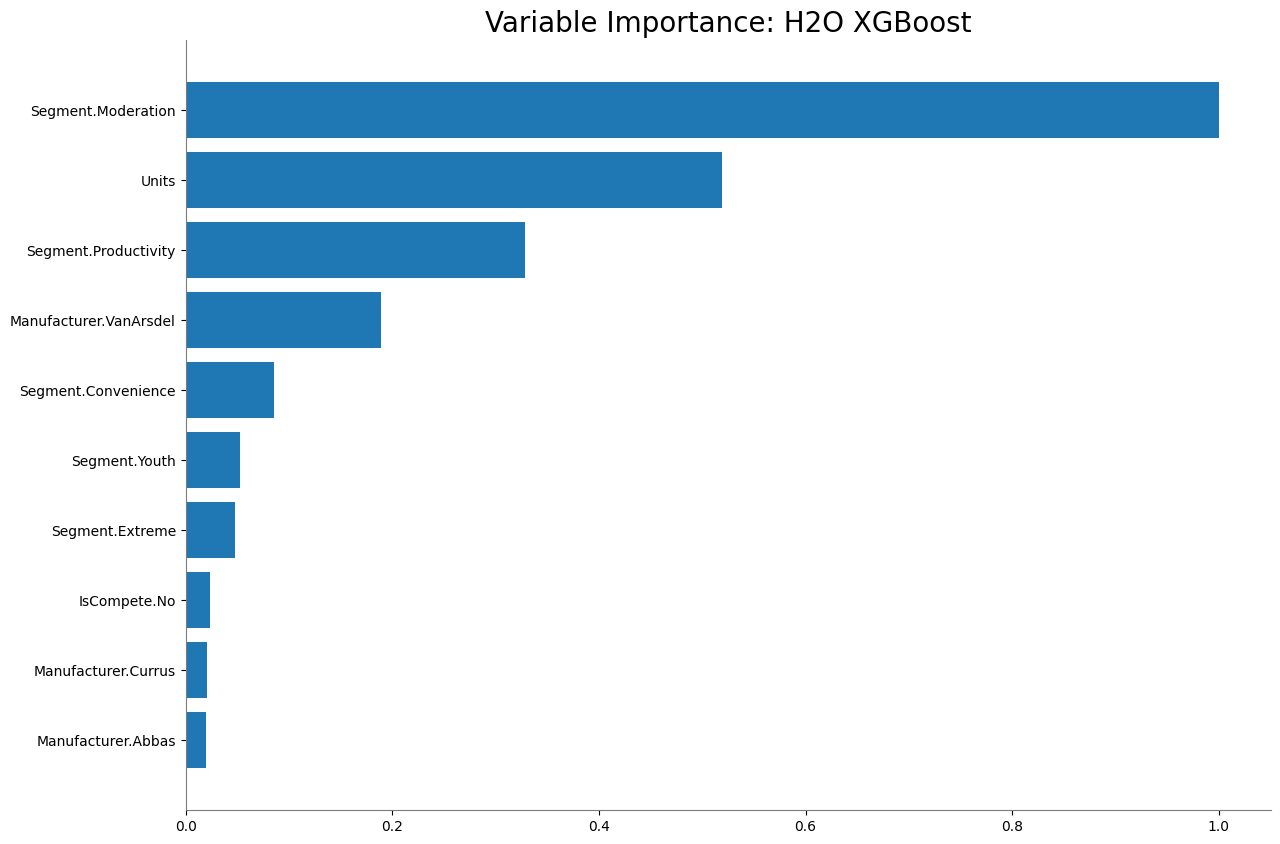

Model ID: XGBoost_1_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

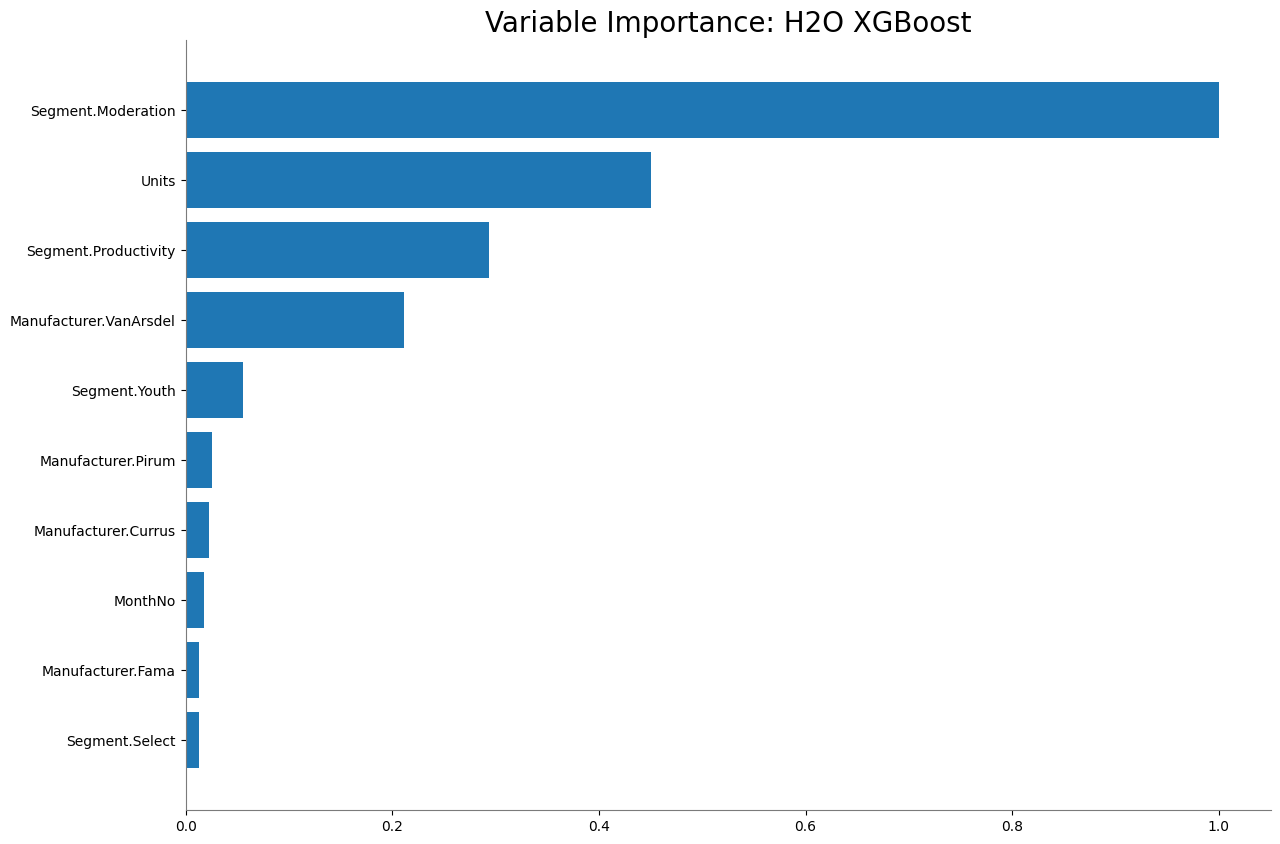

Model ID: XGBoost_2_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

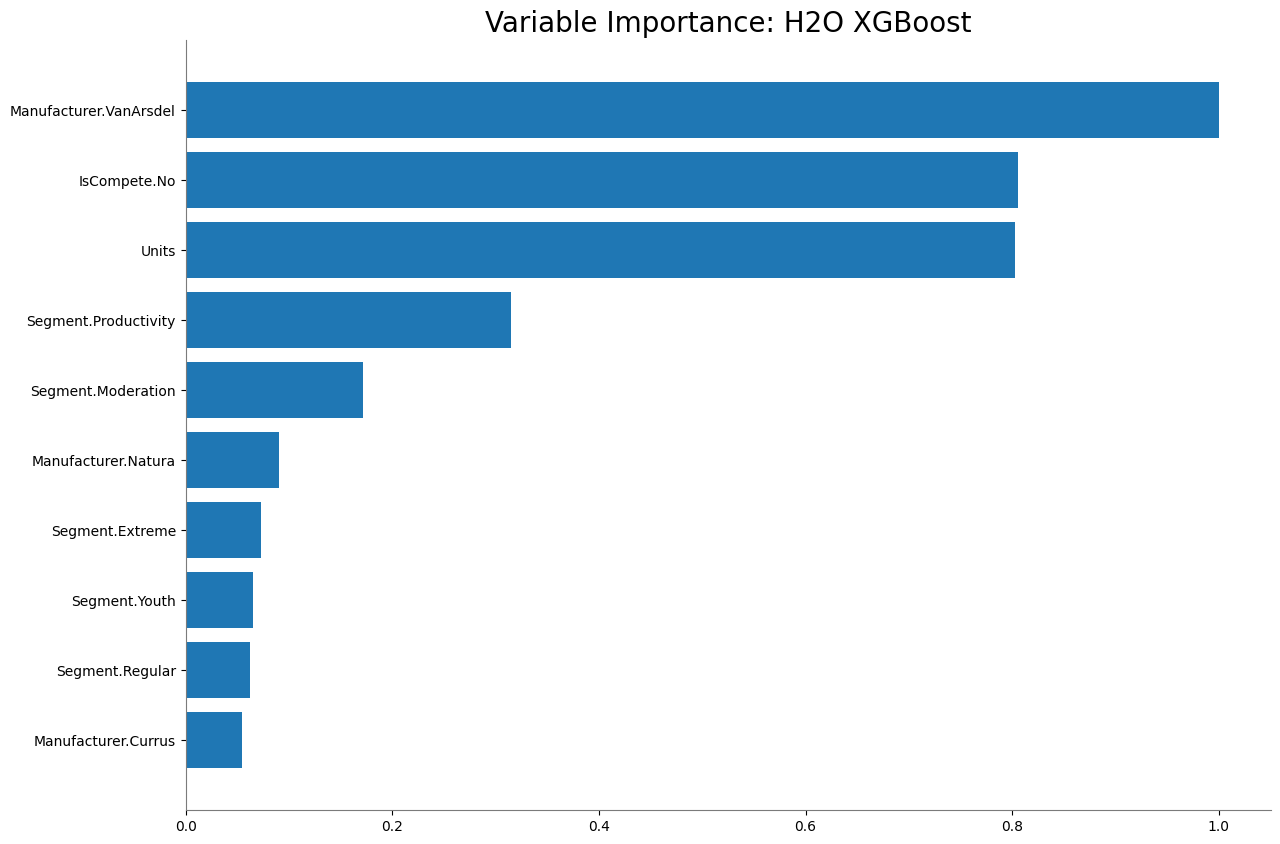

Model ID: DRF_1_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

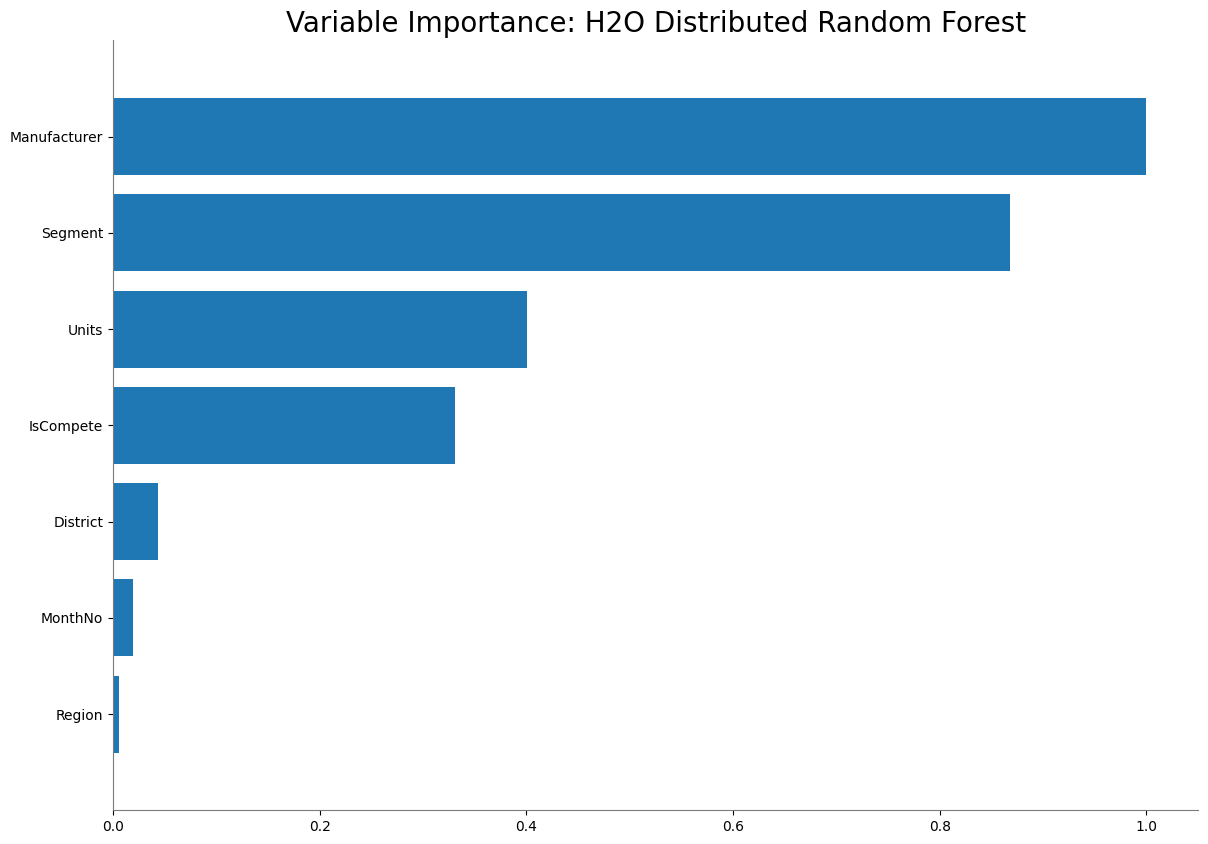

Model ID: GBM_1_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

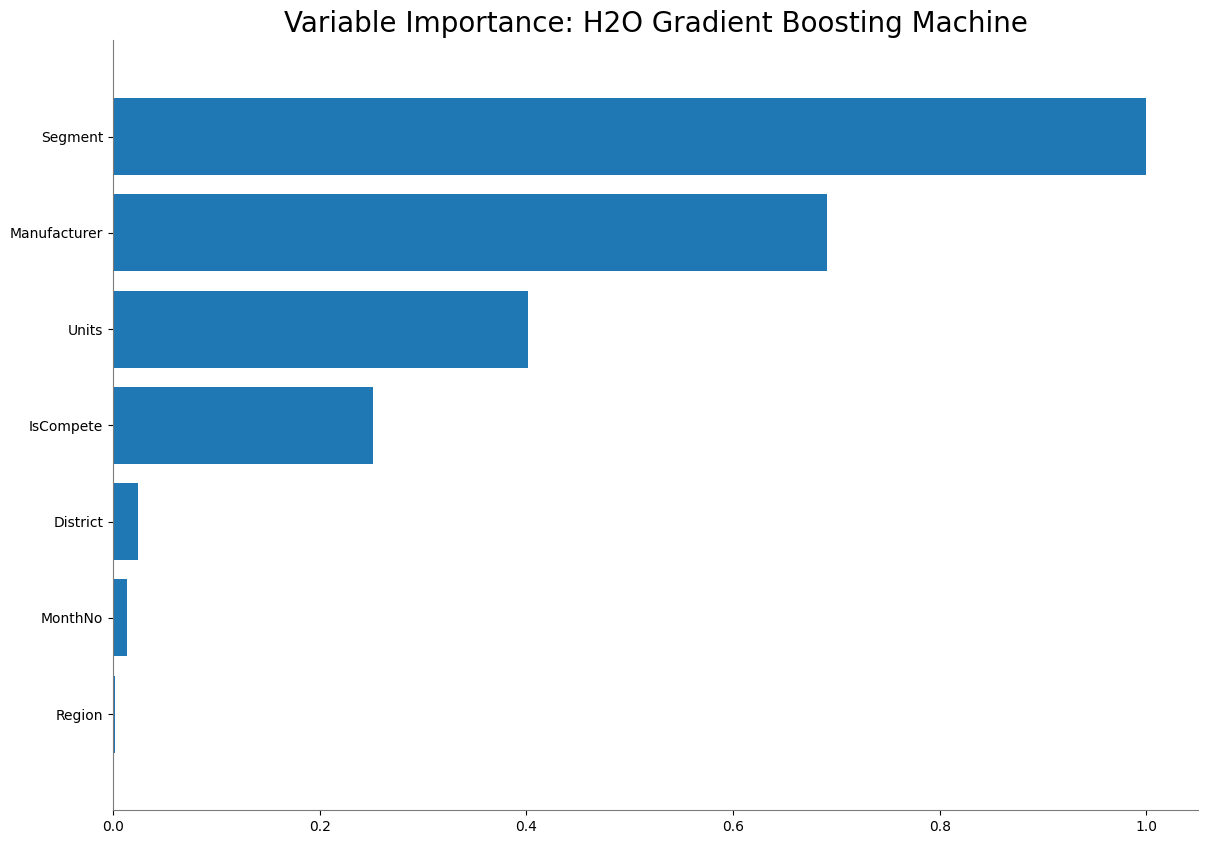

Model ID: XRT_1_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

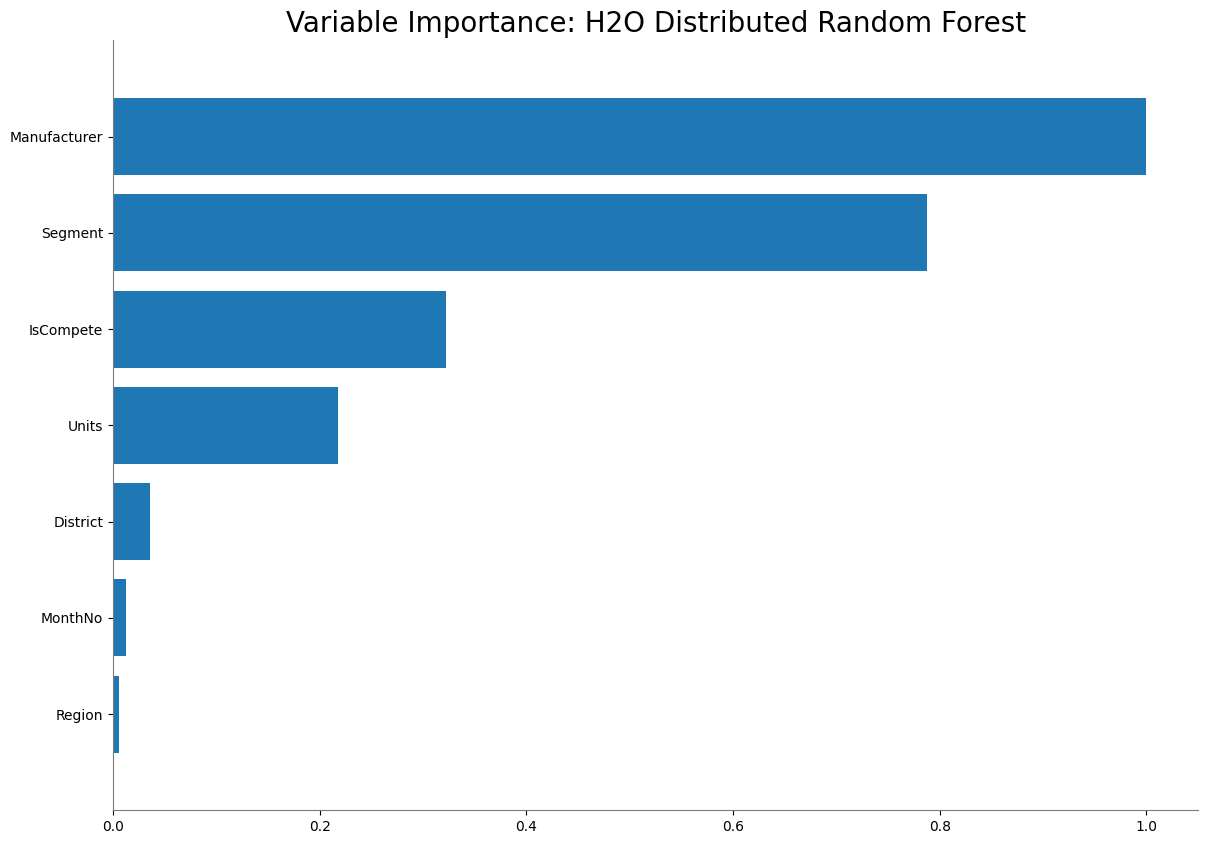

Model ID: GLM_1_AutoML_3_20230921_111515


<Figure size 640x480 with 0 Axes>

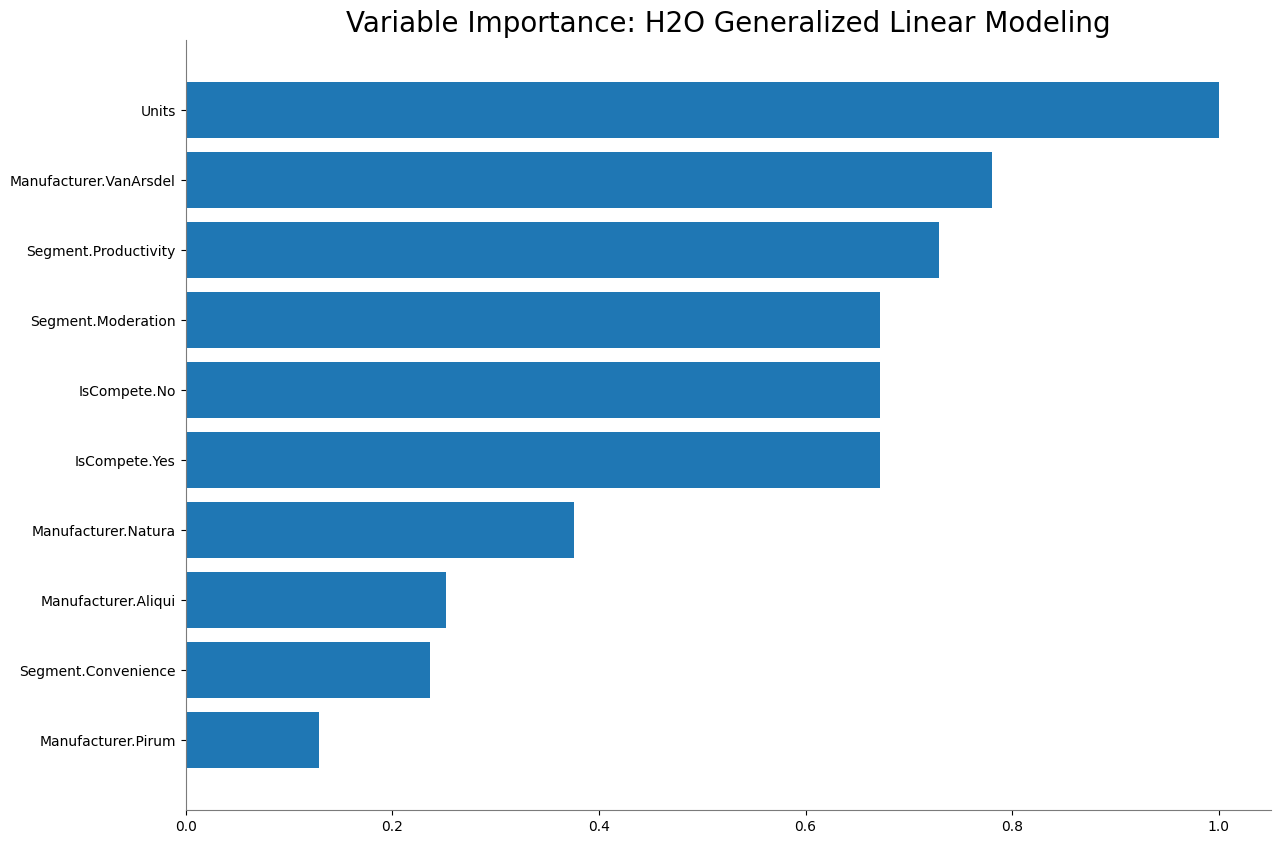

<Figure size 640x480 with 0 Axes>

In [34]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [35]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Revenue_T'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_BestOfFamily_1_AutoML_3_20230921_111515
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3862571.495607358
RMSE: 1965.342589882832
MAE: 1363.7478015098243
RMSLE: 0.41675640227404626
Mean Residual Deviance: 3862571.495607358
R^2: 0.826853794770485
Null degrees of freedom: 157090
Residual degrees of freedom: 157087
Null deviance: 3504561247023.393
Residual deviance: 606775218816.4554
AIC: 2828389.5915193497
R2 cross validation: 0.8747047447811299
R2 test validation: 0.826853794770485
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.8148567542558816
-------------------
-------------------
Model ID: StackedEnsemble_AllModels_1_AutoML_3_20230921_111515
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3855014.5421585366
RMSE: 1963.4190948848736
MAE: 1362.1844011739954
RMSLE: 0.4176196715325641
Mean Residual Deviance: 3855014.5421585

# Графии кривых обучения

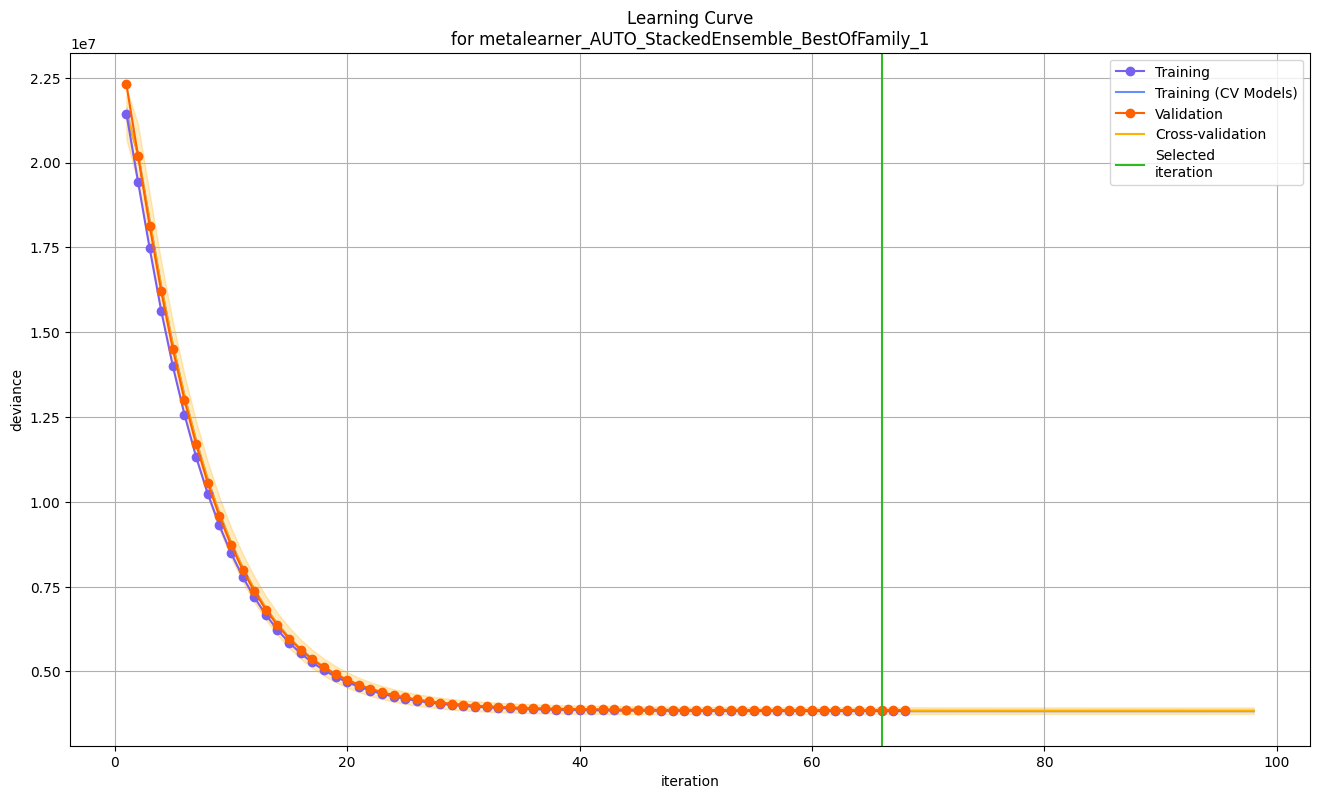

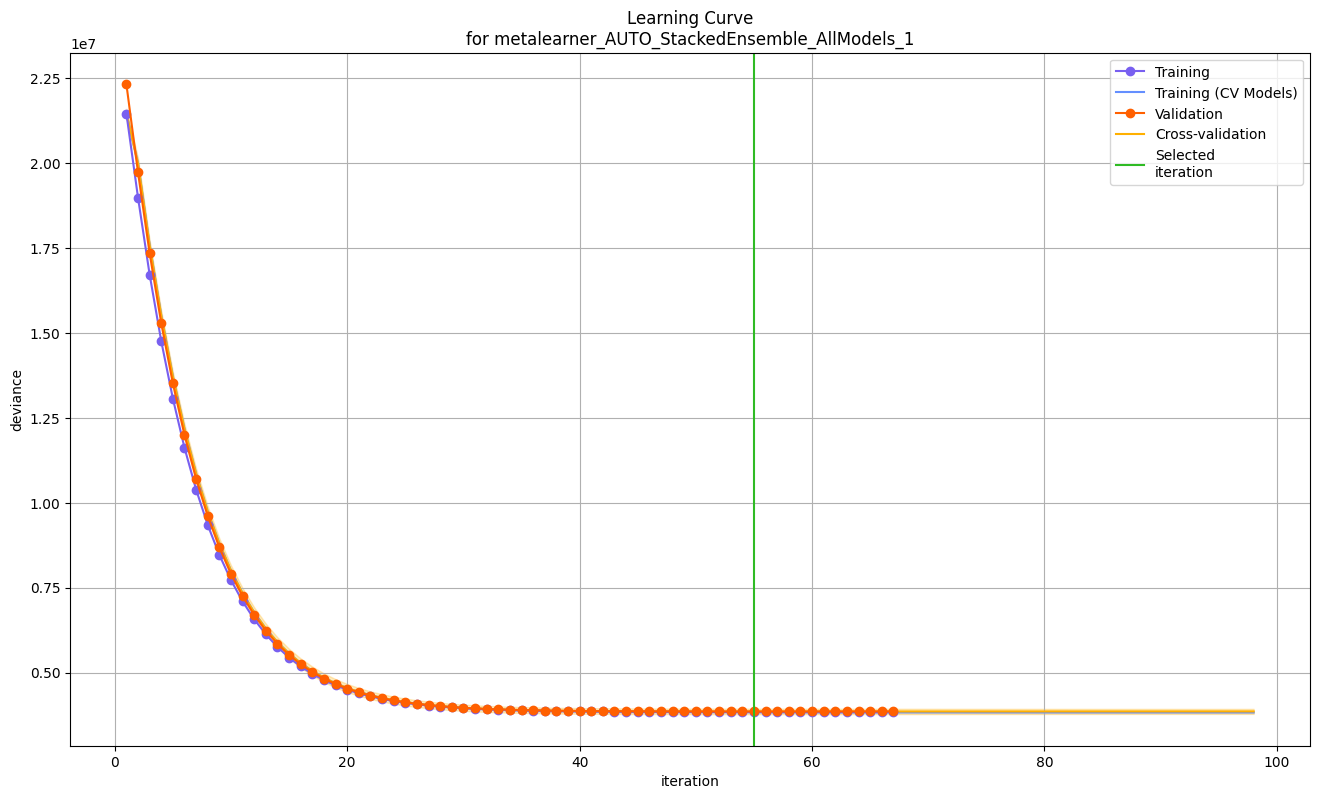

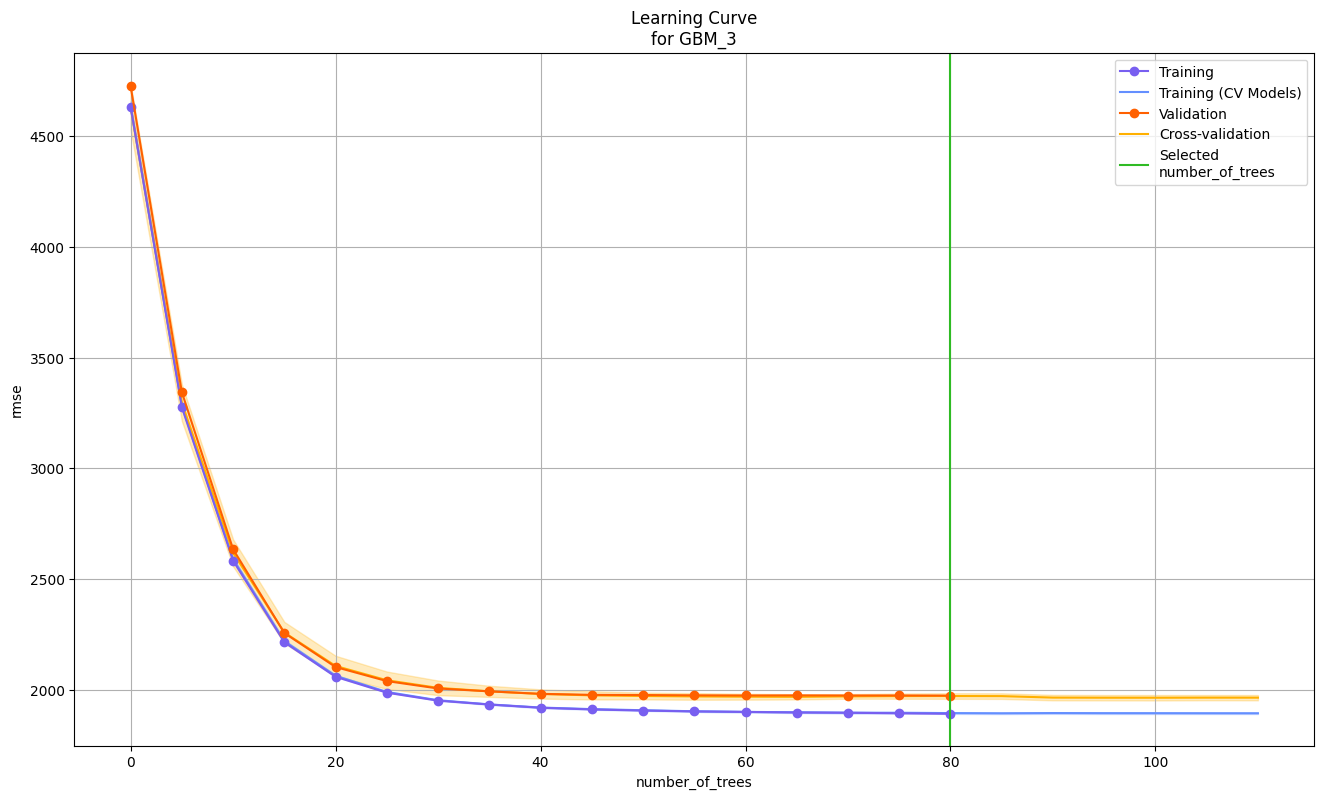

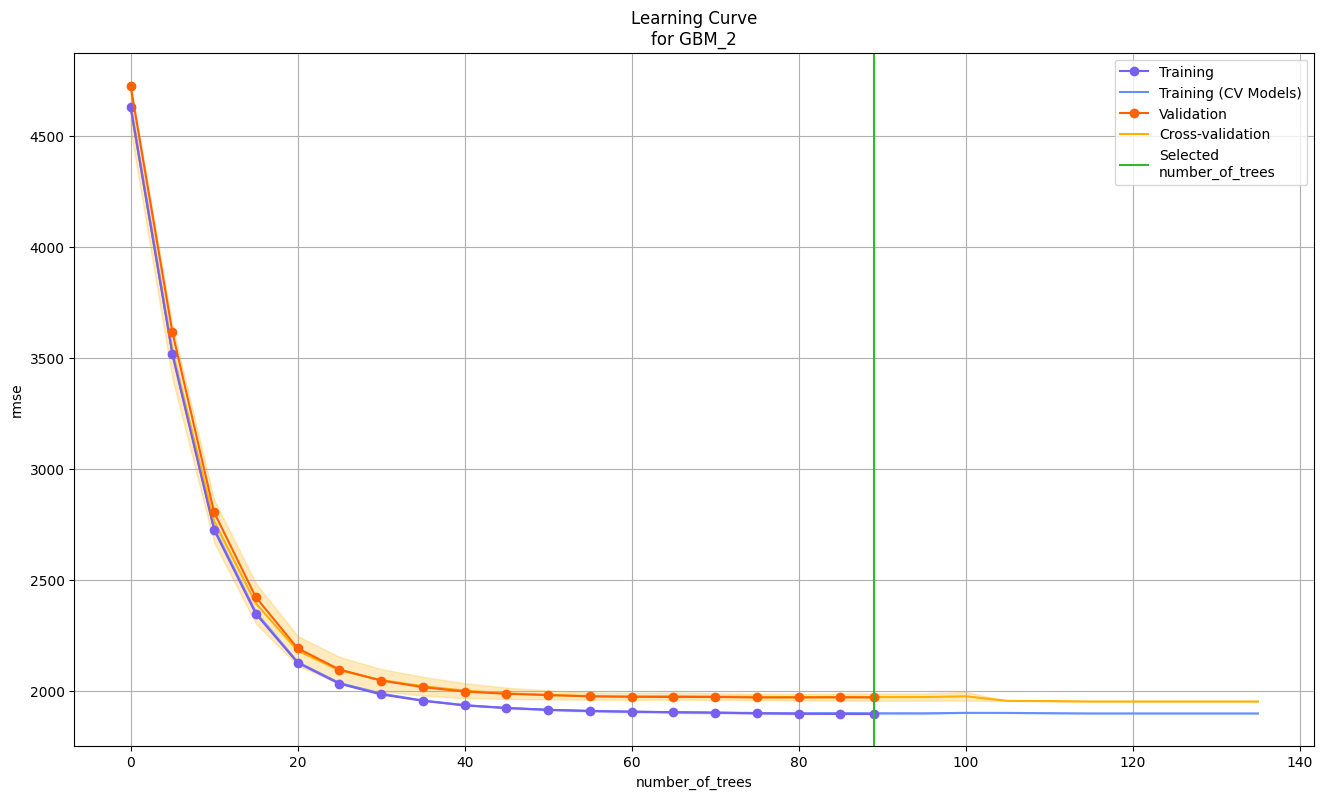

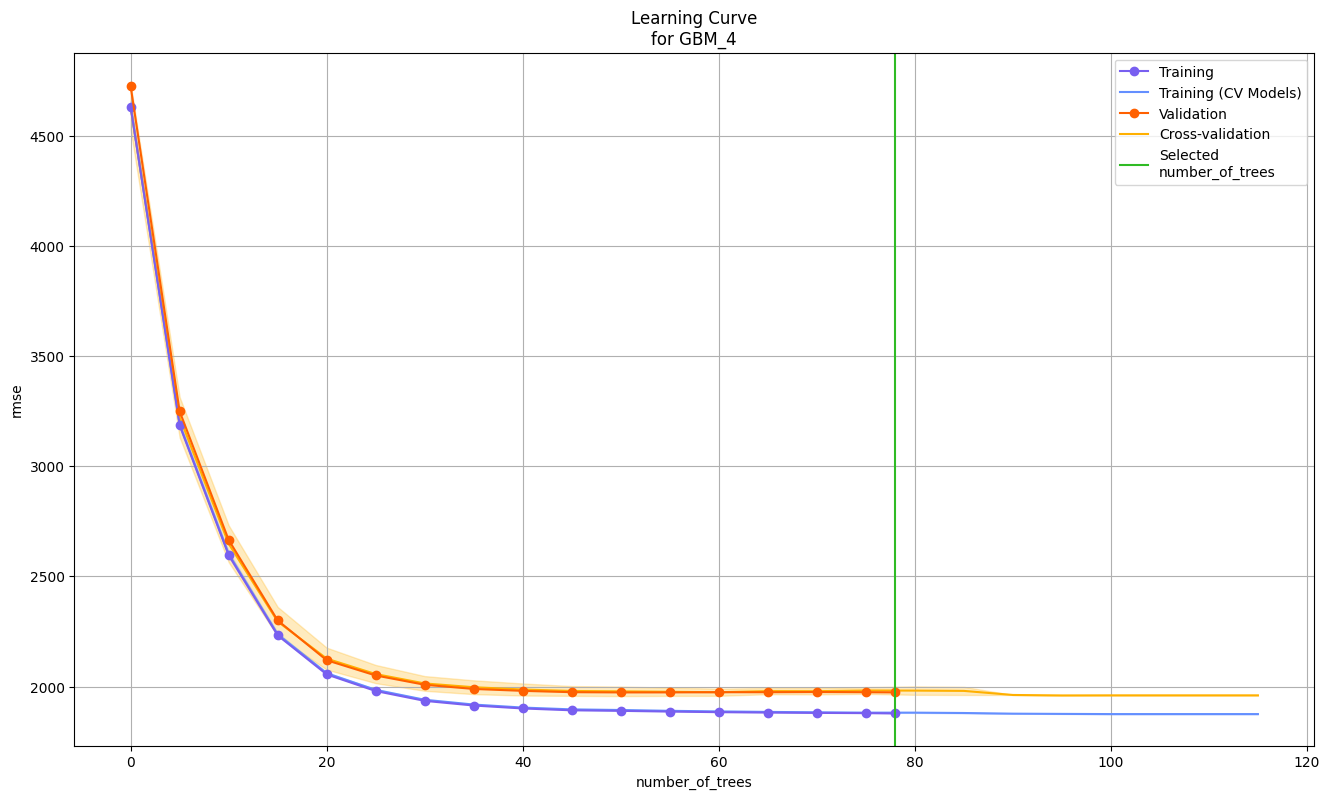

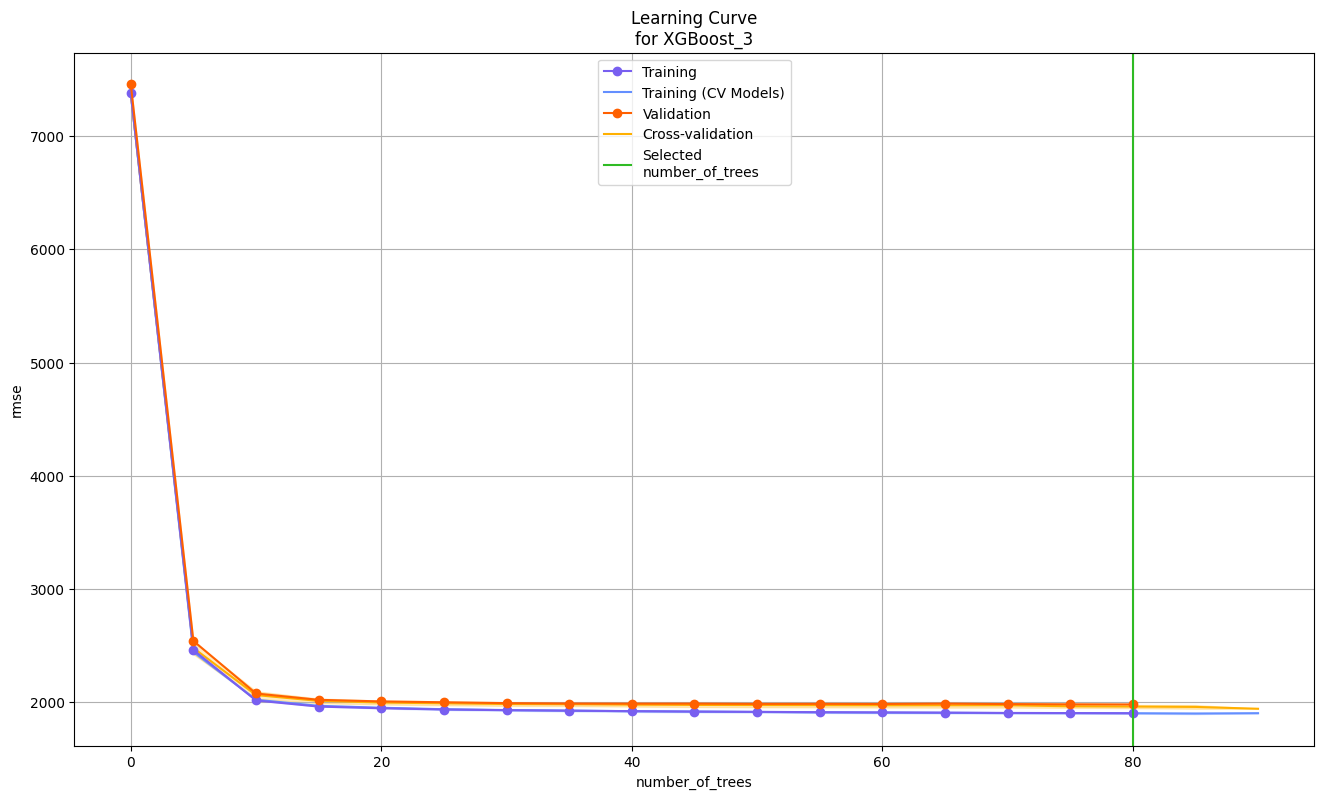

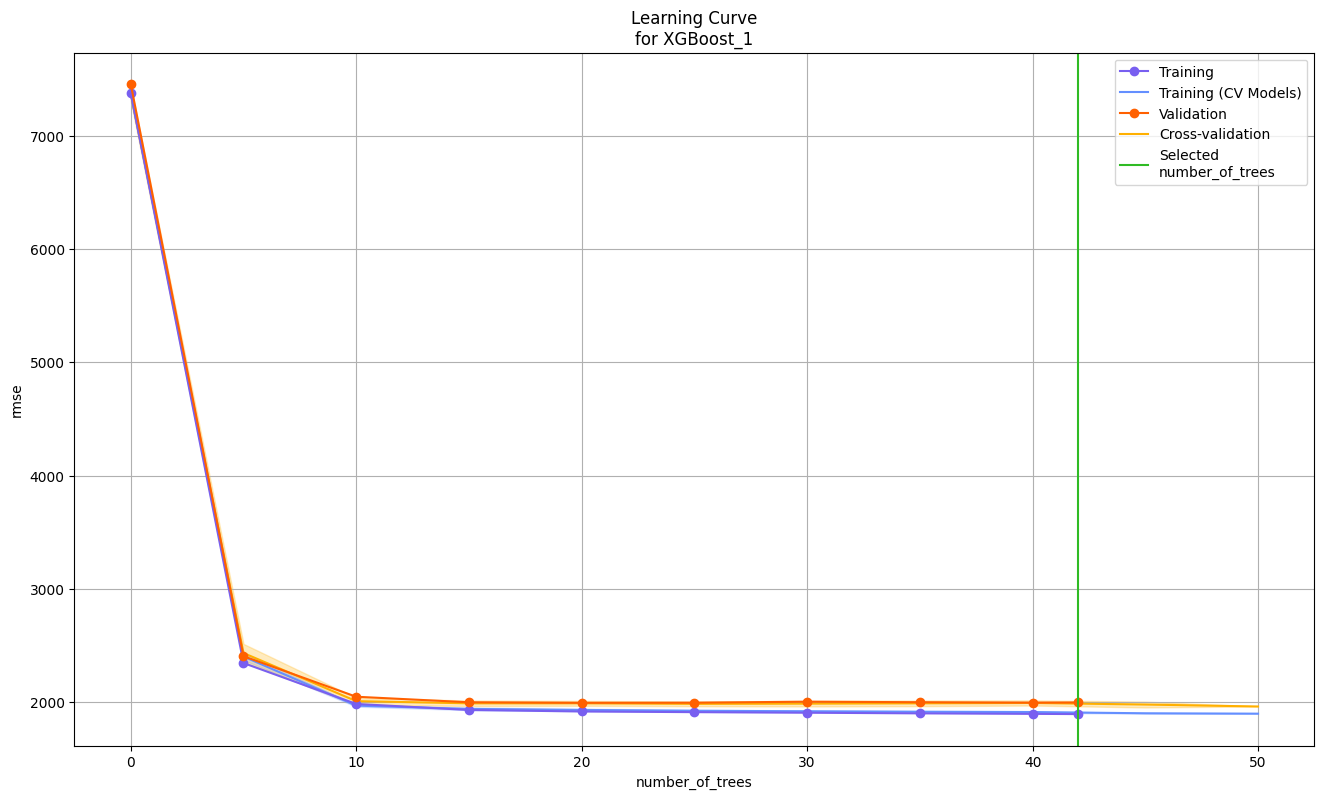

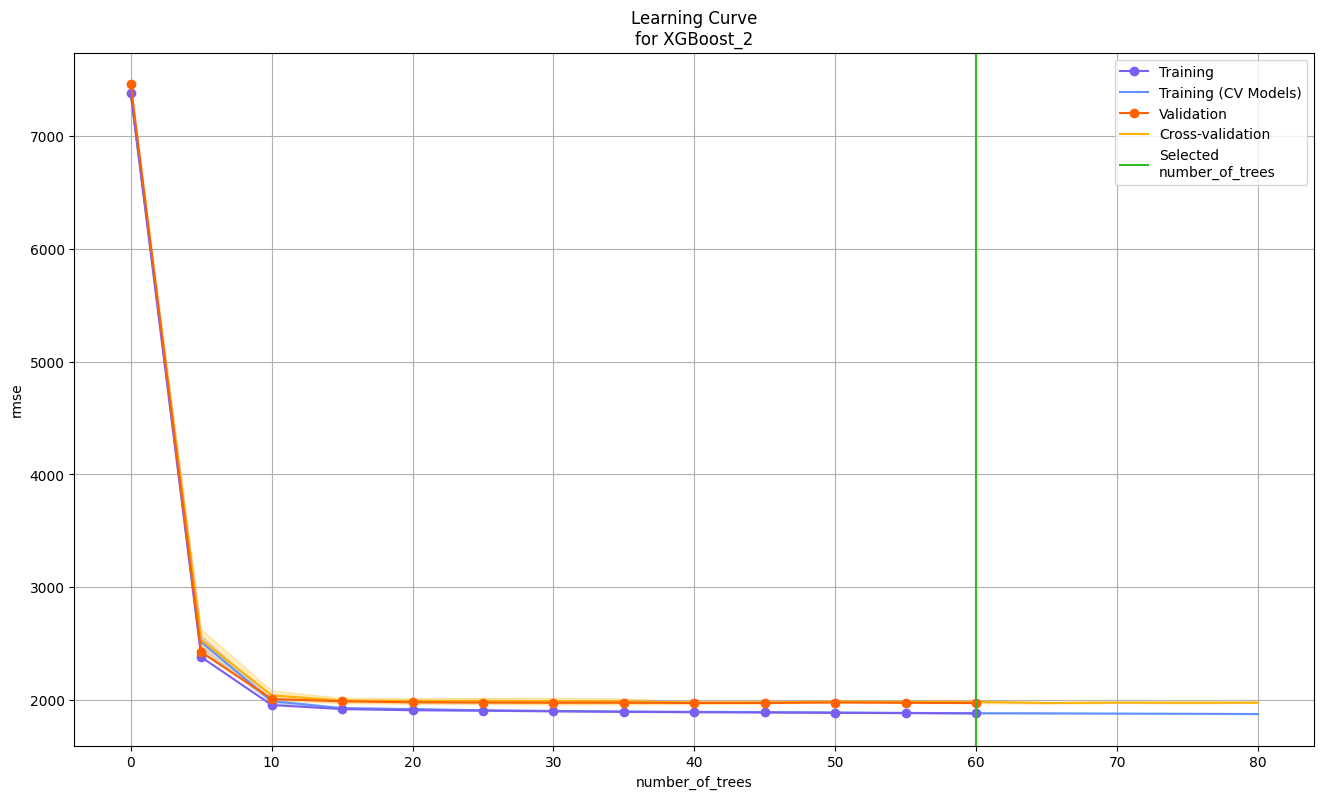

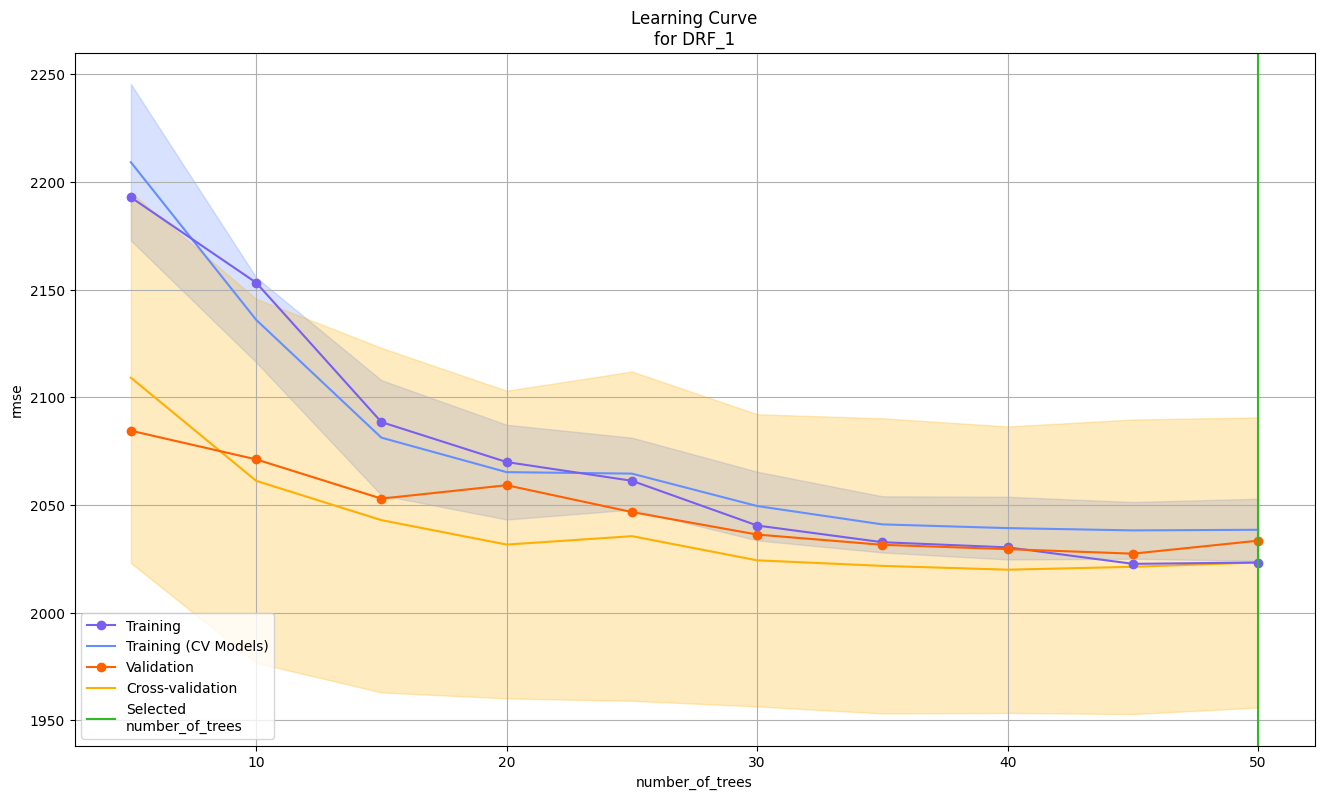

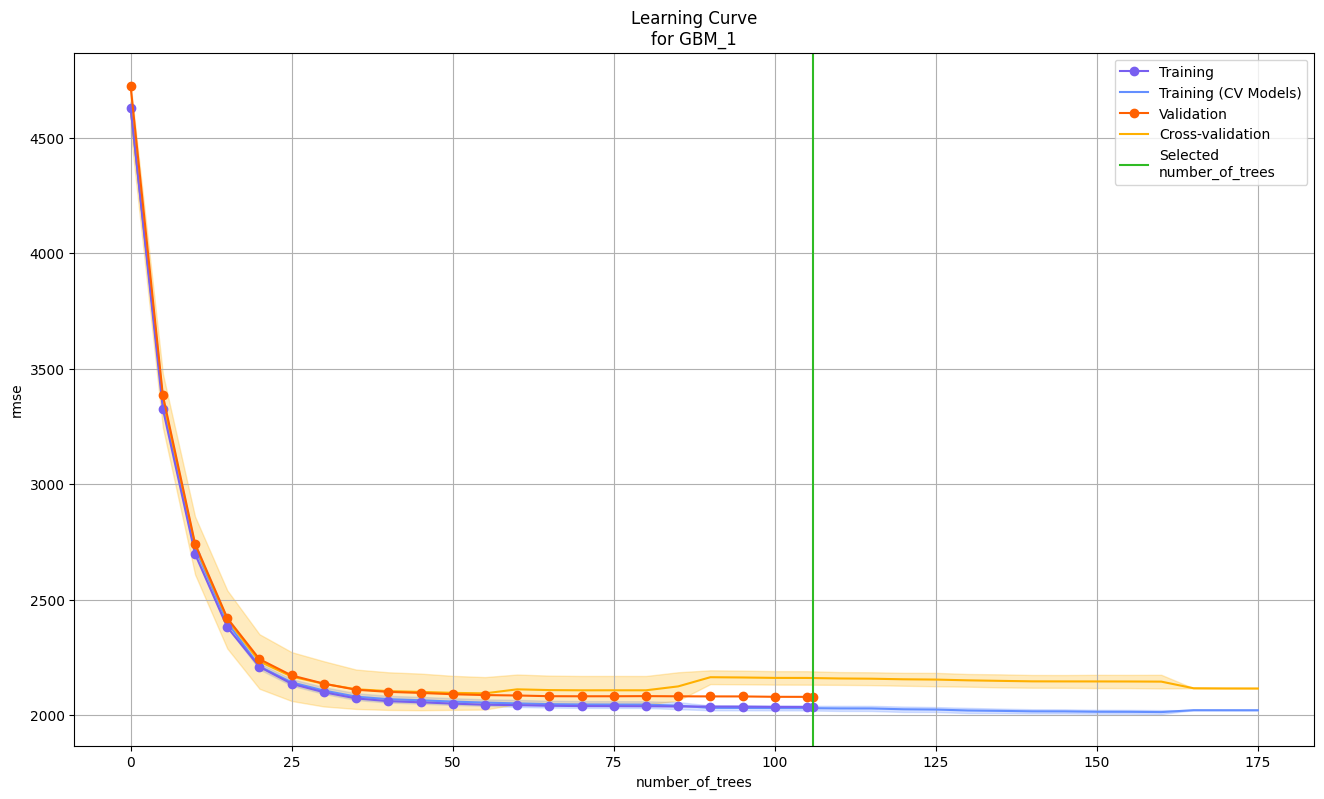

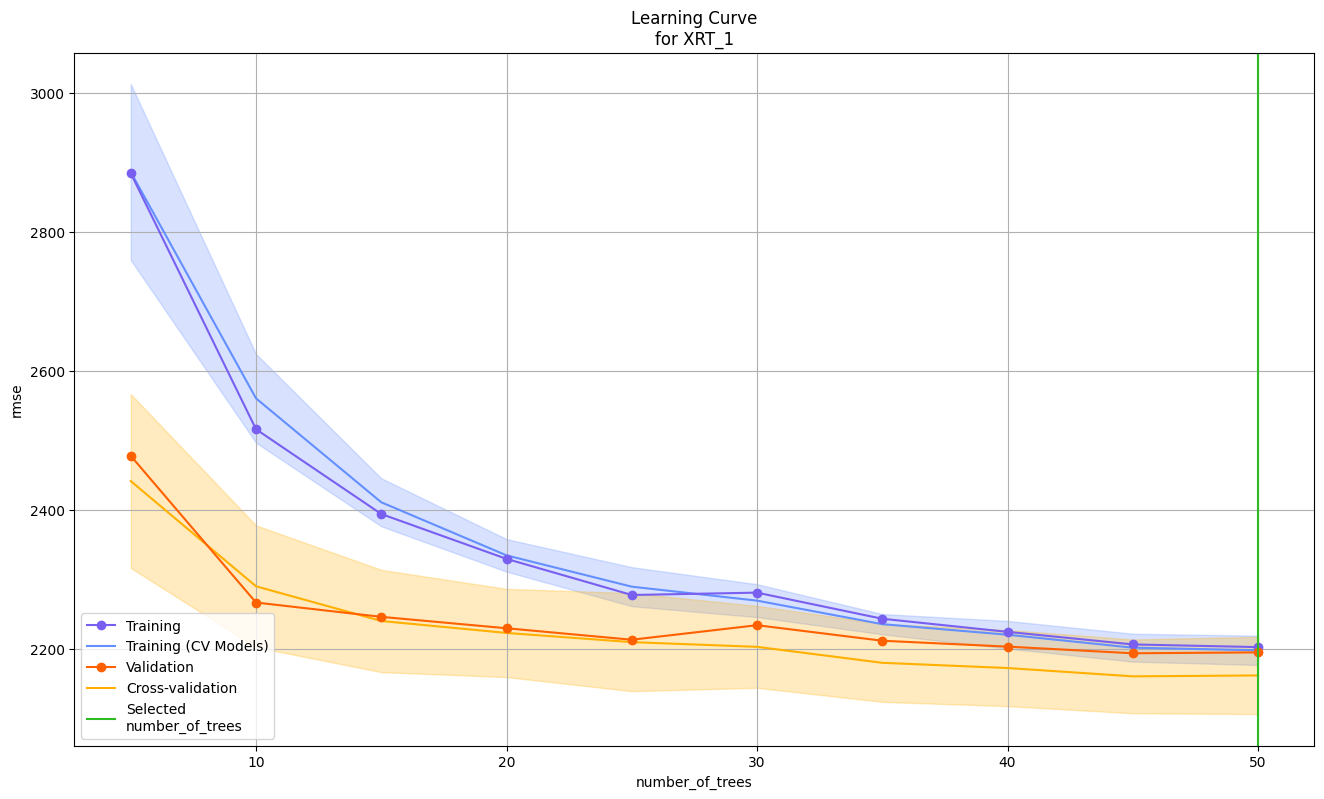

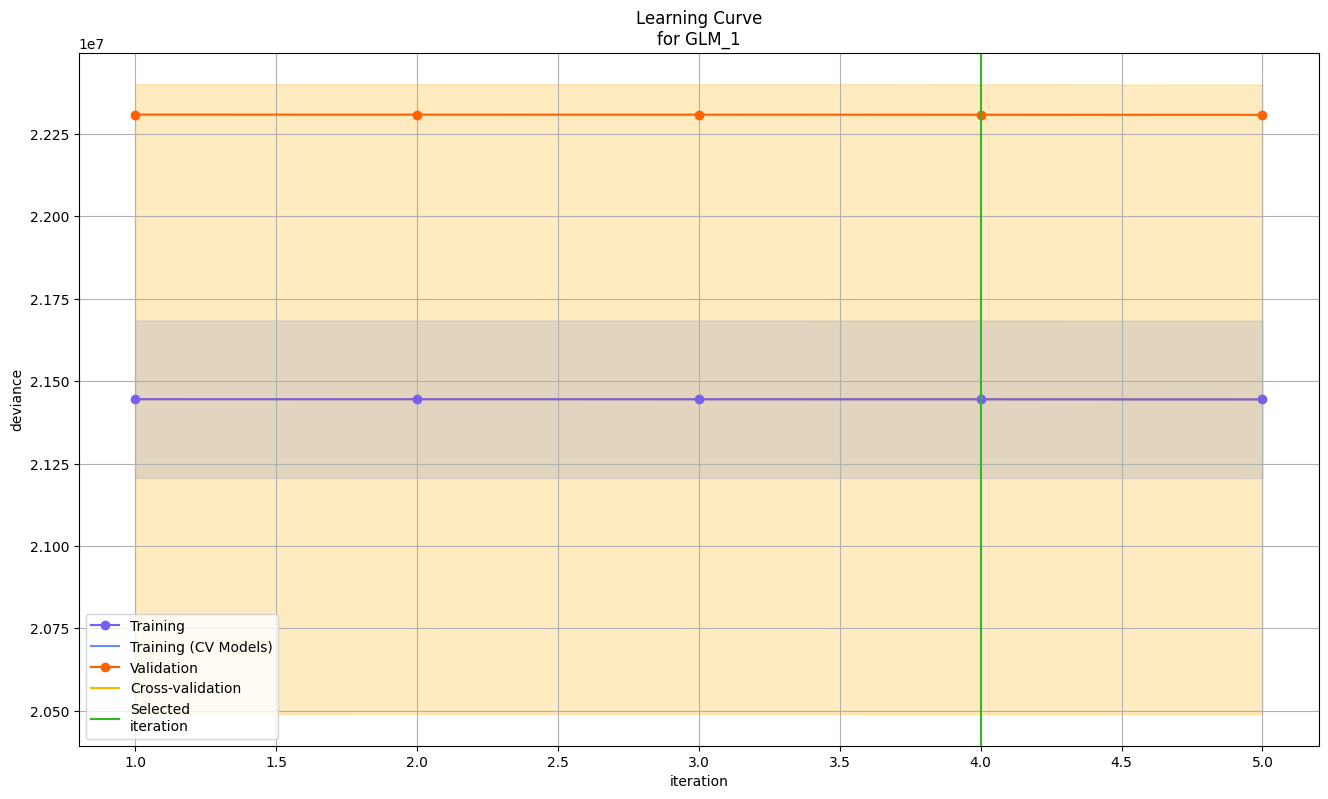

In [36]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [37]:
best_model_id = 'StackedEnsemble_AllModels_1_AutoML_3_20230921_111515'

In [38]:
# Сохранение лучшей модели
best_model = h2o.get_model(best_model_id)
h2o.save_model(best_model, path = "./models")

'/home/jupyter/Diplom/models/StackedEnsemble_AllModels_1_AutoML_3_20230921_111515'